In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import tensorboard

D:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting D:\ProgramData\fashion-mnist_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting D:\ProgramData\fashion-mnist_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting D:\ProgramData\fashion-mnist_data\t10k-images-idx3-ubyte.gz
Extracting D:\ProgramData\fashion-mnist_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
1
2
3
4
5
6
7
8
Iter0, Testing Accuracy= 0.7734
Iter1, Testing Accuracy= 0.8138
Iter2, Testing Accuracy= 0.857
Iter3, Testing Accuracy= 0.8753
Iter4, Testing Accuracy= 0.8881
Iter5, Testing Accuracy= 0.8873
It

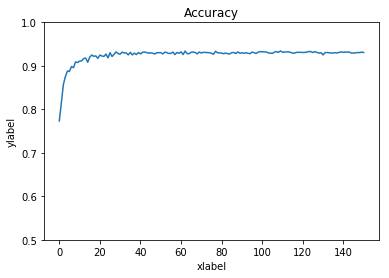

In [2]:
mnist = input_data.read_data_sets(r"D:\ProgramData\fashion-mnist_data",one_hot=True)
    
batch_size = 100

n_batch = mnist.train.num_examples//batch_size

xlabel = []
ylabel = []

def variable_summaries(var):
    with tf.name_scope('summaries'):
        mean = tf.reduce_mean(var)
        tf.summary.scalar('mean',mean)
        with tf.name_scope('stddev'):
            stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
        tf.summary.scalar('stddev',stddev)
        tf.summary.scalar('max',tf.reduce_max(var))
        tf.summary.scalar('min',tf.reduce_min(var))
        tf.summary.histogram('histogram',var)
        

def weight_vaiable(shape):
    initial = tf.truncated_normal(shape,stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1,shape=shape)
    return tf.Variable(initial)

def conv2d(x,W):
    return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

def avg_pool_7x7(x):
    return tf.nn.avg_pool(x,ksize=[1,7,7,1],strides=[1,7,7,1],padding='SAME')

def avg_pool_2x2(x):
    return tf.nn.avg_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

print(1)

with tf.name_scope('input'):
    x = tf.placeholder(tf.float32,[None,784],name='x-input')
    y = tf.placeholder(tf.float32,[None,10],name='y-input')

    x_image = tf.reshape(x,[-1,28,28,1])

print(2)

with tf.name_scope('layer'):
    
#     with tf.name_scope('layer1'):
#         with tf.name_scope('weights1'):
#             W_conv1 = weight_vaiable([3,3,1,4])
#             variable_summaries(W_conv1,layer1 + '/weights1')
#         with tf.name_scope('bias1'):
#             b_conv1 = bias_variable([4])
#             vaiable_summaries(b_conv1,layer1 + '/bias1')
#     with tf.name_scope('h_conv1'):
#         with tf.name_scope('h_conv1'):
#             h_conv1 = tf.nn.relu(conv2d(x_image,W_conv1) + b_conv1)
#             vaiable_summaries(h_conv1,layer1 + 'h_conv1')
#             h_pool1 = max_pool_2x2(h_conv1)
#             vaiable_summaries(h_pool1,layer1 + 'h_pool1')
    
#     with tf.name_scope('layer2'):
#         with tf.name_scope('weights2'):
#             W_conv2 = weight_vaiable([3,3,4,8])
#             vaiable_summaries(W_conv2,layer2 + '/weights2')
#         with tf.name_scope('bias2'):
#             b_conv2 = bias_variable([8])
#             vaiable_summaries(b_conv2,layer2 + '/bias2')
#     with tf.name_scope('h_conv2'):
#         with tf.name_scope('h_conv2'):
#             h_conv2 = tf.nn.relu(conv2d(h_pool1,W_conv2) + b_conv2)
#             vaiable_summaries(h_conv2,layer2 + 'h_conv2')
#             h_pool2 = max_pool_2x2(h_conv2)
#             vaiable_summaries(h_pool2,layer2 + 'h_pool2')
#     W_conv1 = weight_vaiable([3,3,1,2])
#     b_conv1 = bias_variable([2])
    
#     h_conv1 = tf.nn.relu6(conv2d(x_image,W_conv1) + b_conv1)
    
#     h_conv11 = tf.nn.relu(conv2d(x_image,W_conv1) + b_conv1)
    
#     h_conv11_flat = tf.reshape(h_conv11,[-1,28*28*2])
    
#     W_fc1 = weight_vaiable([28*28*2,10])
#     b_fc1 = bias_variable([10])
    
#     h_fc1 = tf.multiply(h_conv11_flat,W_fc1) + b_fc1
#     qz = tf.reduce_mean(h_fc1)

    W_conv2 = weight_vaiable([3,3,1,16])
    b_conv2 = bias_variable([16])

    h_conv2 = tf.nn.leaky_relu(conv2d(x_image,W_conv2) + b_conv2)
    
#     avg_mean1 = tf.mod(tf.reduce_mean(h_conv2))
    
    W_conv3 = weight_vaiable([3,3,16,32])
    b_conv3 = bias_variable([32])
    
    h_conv3 = tf.nn.leaky_relu(conv2d(h_conv2,W_conv3) + b_conv3)
    
#     avg_mean2 = tf.mod(tf.reduce_mean(h_conv3))
    
    h_pool1 = max_pool_2x2(h_conv3)
    
    W_conv4 = weight_vaiable([3,3,32,64])
    b_conv4 = bias_variable([64])

    h_conv4 = tf.nn.leaky_relu(conv2d(h_pool1,W_conv4) + b_conv4)
    
#     avg_mean3 = tf.reduce_mean(h_conv4)
    
    W_conv5 = weight_vaiable([3,3,64,128])
    b_conv5 = bias_variable([128])
    
    h_conv5 = tf.nn.leaky_relu(conv2d(h_conv4,W_conv5) + b_conv5)  
    
#     avg_mean4 = tf.reduce_mean(h_conv5)
    
#     W_conv6 = weight_vaiable([3,3,32,64])
#     b_conv6 = bias_variable([64])
    
#     h_conv6 = tf.nn.leaky_relu(conv2d(h_conv5,W_conv6) + b_conv6)
    
    h_pool2 = max_pool_2x2(h_conv5)
    
    W_conv7 = weight_vaiable([3,3,128,256])
    b_conv7 = bias_variable([256])
    
    h_conv7 = tf.nn.leaky_relu(conv2d(h_pool2,W_conv7) + b_conv7)
    
    W_conv8 = weight_vaiable([3,3,256,10])
    b_conv8 = bias_variable([10])
    
    h_conv8 = tf.nn.leaky_relu(conv2d(h_conv7,W_conv8) + b_conv8)
        
    h_pool3 = avg_pool_7x7(h_conv8)
    
    h_pool4_flat = tf.reshape(h_pool3,[-1,10])
    
    keep_prob = tf.placeholder(tf.float32)
    
    h_pool4_drop = tf.nn.dropout(h_pool4_flat,keep_prob)
    
#     W_fc2 = weight_vaiable([7*7*256,10])
#     b_fc2 = bias_variable([10])
    
#     prediction = tf.matmul(h_pool4_drop,W_fc2) + b_fc2
    
#     prediction = tf.nn.softmax(tf.matmul(h_pool4_drop,W_fc2) + b_fc2)
    
#     prediction = h_pool4_drop

    prediction = tf.nn.softmax(h_pool4_drop)
    
#     W_fc1 = weight_vaiable([7*7*16,10])
#     b_fc1 = bias_variable([10])
    
#     keep_prob = tf.placeholder(tf.float32)

#     h_pool4_flat = tf.reshape(h_pool2,[-1,7*7*16])
    
#     h_pool4_drop = tf.nn.dropout(h_pool4_flat,keep_prob)

#     prediction = tf.nn.softmax(tf.matmul(h_pool4_drop,W_fc1) + b_fc1)


# W_conv22 = weight_vaiable([3,3,1,4])
# b_conv22 = bias_variable([4])

# h_conv22 = tf.nn.leaky_relu(conv2d(x_image,W_conv22) + b_conv22)

# h_pool11 = max_pool_2x2(h_conv22)

# W_conv33 = weight_vaiable([3,3,4,10])
# b_conv33 = bias_variable([10])

# h_conv33 = tf.nn.leaky_relu(conv2d(h_pool11,W_conv33) + b_conv33)

# h_pool22 = max_pool_2x2(h_conv33)

# h_pool33 = avg_pool_7x7(h_pool22)

# h_pool44_flat = tf.reshape(h_pool33,[-1,10])

# prediction1 = tf.nn.softmax(h_pool44_flat)


print(3)

with tf.name_scope('loss'):
    
#     prediction2 = tf.add(prediction1,prediction)
    
#     prediction3 = tf.nn.softmax(prediction2)
    
    q = tf.log(prediction)
    
    w = -tf.multiply(q,y)
    
    e = tf.square(prediction)
    
    r = tf.multiply(e,prediction)
    
    t = tf.gradients(r,prediction)
    
    a = tf.subtract(y,t)
    
    s = tf.square(a)
    
    l = tf.square(prediction)
    
    k = -tf.log(l)
    
    j = tf.multiply(y,k)
    
    loss = tf.reduce_mean(w + s + j)
    
#      + tf.contrib.layers.l2_regularizer(0.5)(W_conv2)

#     cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=prediction))
    

    tf.summary.scalar('loss',loss)

#     tf.summary.scalar('cross_entropy',cross_entropy)
# 1e-2 - 0.00001 * str(epoch) +np.random.normal(-3e-4,3e-4)
print(4)

with tf.name_scope('train'):
    
    train_step = tf.train.AdamOptimizer(1e-3 + np.random.normal(-4e-4,4e-4)).minimize(loss)

#     train_step = tf.train.AdamOptimizer(1e-3 + np.random.normal(-4e-4,4e-4)).minimize(cross_entropy)
    
print(5)

with tf.name_scope('accuracy'):

    with tf.name_scope('correct_prediction'):

        correct_prediction = tf.equal(tf.argmax(prediction,1),tf.argmax(y,1))

    with tf.name_scope('accuracy'):

        accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

        tf.summary.scalar('accuracy',accuracy)
        
print(6)

merged = tf.summary.merge_all()

print(7)

with tf.Session() as sess:   
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter("D:\logs",sess.graph)
    print(8)
    for epoch in range(151):
        for batch in range(n_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
#             summary = sess.run(merged,feed_dict={x:batch_xs,y:batch_ys,keep_prob:0.7})
            sess.run(train_step,feed_dict={x:batch_xs,y:batch_ys,keep_prob:0.8})
#             sess.run(train_step,feed_dict={x:batch_xs,y:batch_ys,keep_prob:0.7})
#         writer.add_summary(summary,epoch)
#         train_acc = sess.run(accuracy,feed_dict={x:mnist.train.images,y:mnist.train.labels,keep_prob:1.0})
        acc = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels,keep_prob:1.0})
        xlabel.append(epoch)
        ylabel.append(acc)        
#         print("Iter" + str(epoch) + ", Training Accuracy= " + str(train_acc) + "Iter" + str(epoch) + ", Testing Accuracy= " + str(acc))
        print("Iter" + str(epoch) + ", Testing Accuracy= " + str(acc))
    plt.plot(xlabel,ylabel)
    plt.xlabel('xlabel')
    plt.ylabel('ylabel')
    plt.title('Accuracy')
    plt.yticks([0.5,0.6,0.7,0.8,0.9,1.0])
#     plt.fill_between(xlabel,ylabel,color = 'red')
    plt.show()